In [20]:
#import libs
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [39]:
#Merge CSVs
all_files = glob.glob(os.path.join("../data/raw/*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)

In [40]:
df = df_merged.copy()
df.head(1)

,Time,eNodeB Name,Cell FDD TDD Indication,Cell Name,LocalCell Id,eNodeB Function Name,Integrity,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_DR,...,TE Availabity Daily,EPM_Dropped_Sessions,L.Cell.Unavail.Dur.Manual(s),L.Cell.Unavail.Dur.Sys(s),L.Cell.Avail.Dur(s),EPM_RRC_Failures,EPM_ERABSR_Failures,EPM_Total_Sessions,EPM_ERABSR_Attempts,EPM_RRC_Attempts
0,1/1/2022 0:00,LSINS26110_Site_6110,CELL_FDD,LSINS26110-1,1,LSINS26110_Site_6110,100%,100.0,0.6307,0,...,100.0,0,0,0,3600,0,1,1903,1888,1879


In [41]:
df.drop(['Cell FDD TDD Indication','LocalCell Id','eNodeB Function Name','Integrity'],axis=1,inplace=True)
df.head(1)

,Time,eNodeB Name,Cell Name,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_DR,EPM_ERAB_SR,EPM_DL_Traffic_GB,EPM_CSFB_Preparation_SR,EPM_CSFB_SR,...,TE Availabity Daily,EPM_Dropped_Sessions,L.Cell.Unavail.Dur.Manual(s),L.Cell.Unavail.Dur.Sys(s),L.Cell.Avail.Dur(s),EPM_RRC_Failures,EPM_ERABSR_Failures,EPM_Total_Sessions,EPM_ERABSR_Attempts,EPM_RRC_Attempts
0,1/1/2022 0:00,LSINS26110_Site_6110,LSINS26110-1,100.0,0.6307,0,99.947,0.9672,100.0,100.0,...,100.0,0,0,0,3600,0,1,1903,1888,1879


In [42]:
#Drop missing values
df.dropna(inplace=True)

In [43]:
#Drop duplicates
df.drop_duplicates(inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5221112 entries, 0 to 7339982
Data columns (total 21 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Time                          object 
 1   eNodeB Name                   object 
 2   Cell Name                     object 
 3   EPM_RRC_SR                    float64
 4   EPM_UL_Traffic_GB             float64
 5   EPM_ERAB_DR                   object 
 6   EPM_ERAB_SR                   object 
 7   EPM_DL_Traffic_GB             float64
 8   EPM_CSFB_Preparation_SR       float64
 9   EPM_CSFB_SR                   float64
 10  TE Hourly Avala               float64
 11  TE Availabity Daily           float64
 12  EPM_Dropped_Sessions          int64  
 13  L.Cell.Unavail.Dur.Manual(s)  int64  
 14  L.Cell.Unavail.Dur.Sys(s)     int64  
 15  L.Cell.Avail.Dur(s)           int64  
 16  EPM_RRC_Failures              int64  
 17  EPM_ERABSR_Failures           object 
 18  EPM_Total_Sessions    

In [45]:
#Transform Time from object to datetime format
df['Time'] = pd.to_datetime(df['Time'])

In [46]:
#Transform EPM_ERAB_DR from object to float format
df.drop(df[df['EPM_ERAB_DR']=='NIL'].index,inplace=True)
df['EPM_ERAB_DR'] = df['EPM_ERAB_DR'].apply(lambda x: float(x))

In [47]:
#Transform EPM_ERAB_SR from object to float format
df['EPM_ERAB_SR'] = df['EPM_ERAB_SR'].apply(lambda x: float(x))

In [48]:
#Transform EPM_ERABSR_Failures from object to int format
df['EPM_ERABSR_Failures'] = df['EPM_ERABSR_Failures'].apply(lambda x: int(x))

In [49]:
#Transform EPM_Total_Sessions from object to int format
df['EPM_Total_Sessions'] = df['EPM_Total_Sessions'].apply(lambda x: int(x))

In [50]:
#Transform EPM_Total_Sessions from object to int format
df['EPM_ERABSR_Attempts'] = df['EPM_ERABSR_Attempts'].apply(lambda x: int(x))

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5220987 entries, 0 to 7339982
Data columns (total 21 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Time                          datetime64[ns]
 1   eNodeB Name                   object        
 2   Cell Name                     object        
 3   EPM_RRC_SR                    float64       
 4   EPM_UL_Traffic_GB             float64       
 5   EPM_ERAB_DR                   float64       
 6   EPM_ERAB_SR                   float64       
 7   EPM_DL_Traffic_GB             float64       
 8   EPM_CSFB_Preparation_SR       float64       
 9   EPM_CSFB_SR                   float64       
 10  TE Hourly Avala               float64       
 11  TE Availabity Daily           float64       
 12  EPM_Dropped_Sessions          int64         
 13  L.Cell.Unavail.Dur.Manual(s)  int64         
 14  L.Cell.Unavail.Dur.Sys(s)     int64         
 15  L.Cell.Avail.Dur(s)           in

In [52]:
df.shape

(5220987, 21)

Text(0.5, 1.0, 'dataset correlation')

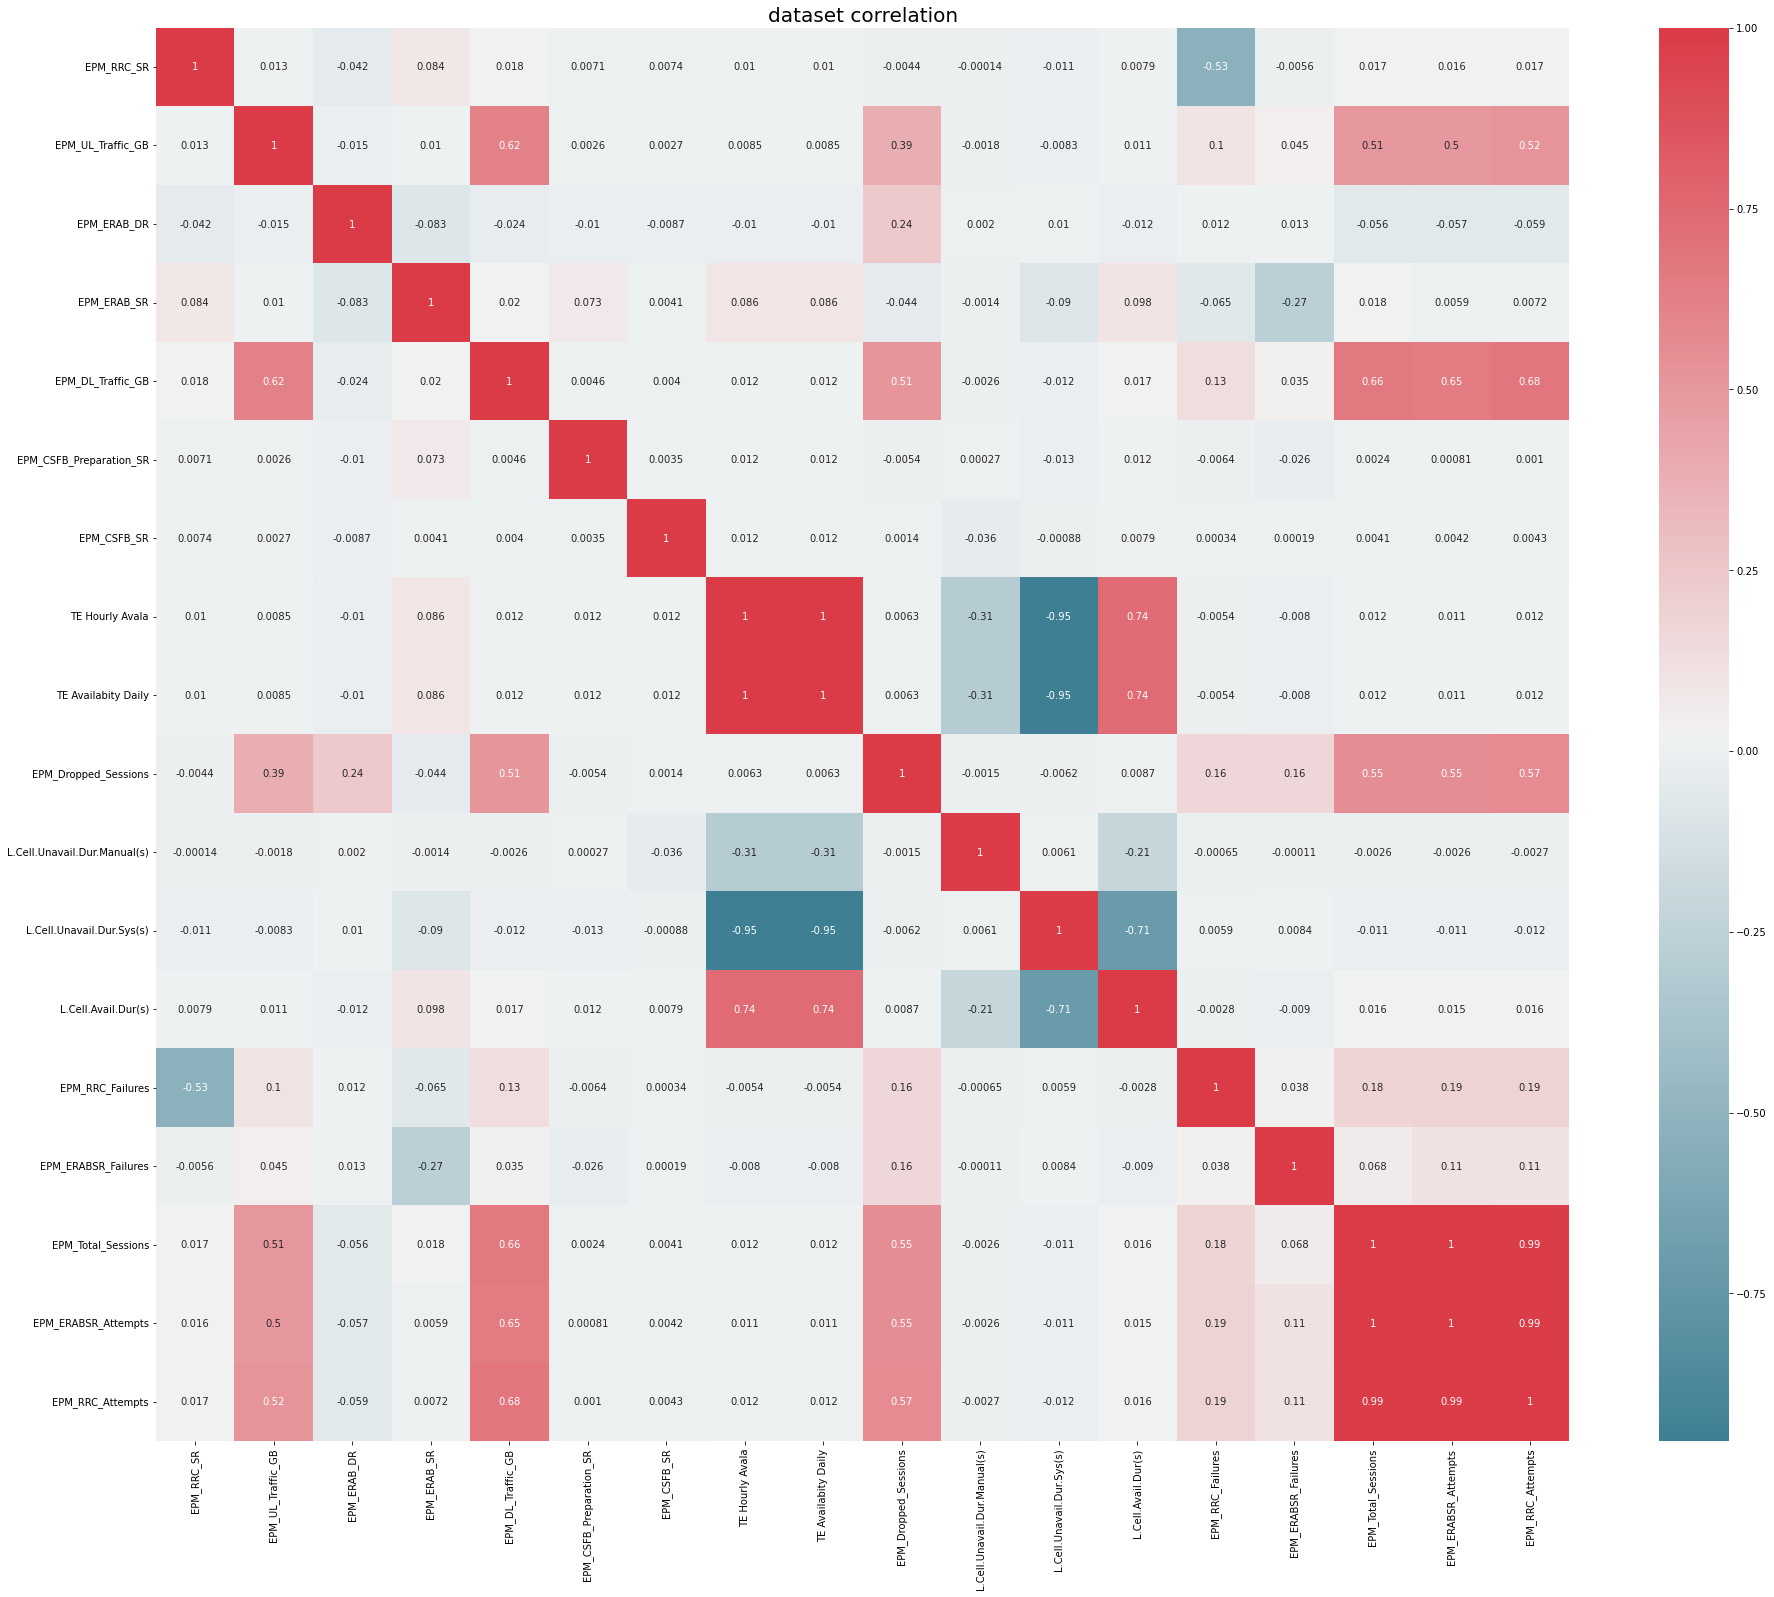

In [53]:
#Heatmap
f, ax = plt.subplots(figsize=(32, 26))
corr = df.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

In [54]:
correlated_features = set()
correlation_matrix = df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>0.9:
            col_name = correlation_matrix.columns[i]
            correlated_features.add(col_name)
print(correlated_features)

{'TE Availabity Daily', 'EPM_RRC_Attempts', 'EPM_ERABSR_Attempts', 'L.Cell.Unavail.Dur.Sys(s)'}


In [55]:
df.drop(['TE Availabity Daily','L.Cell.Unavail.Dur.Sys(s)','EPM_ERABSR_Attempts','EPM_Total_Sessions'],axis=1,inplace=True)

Text(0.5, 1.0, 'dataset correlation')

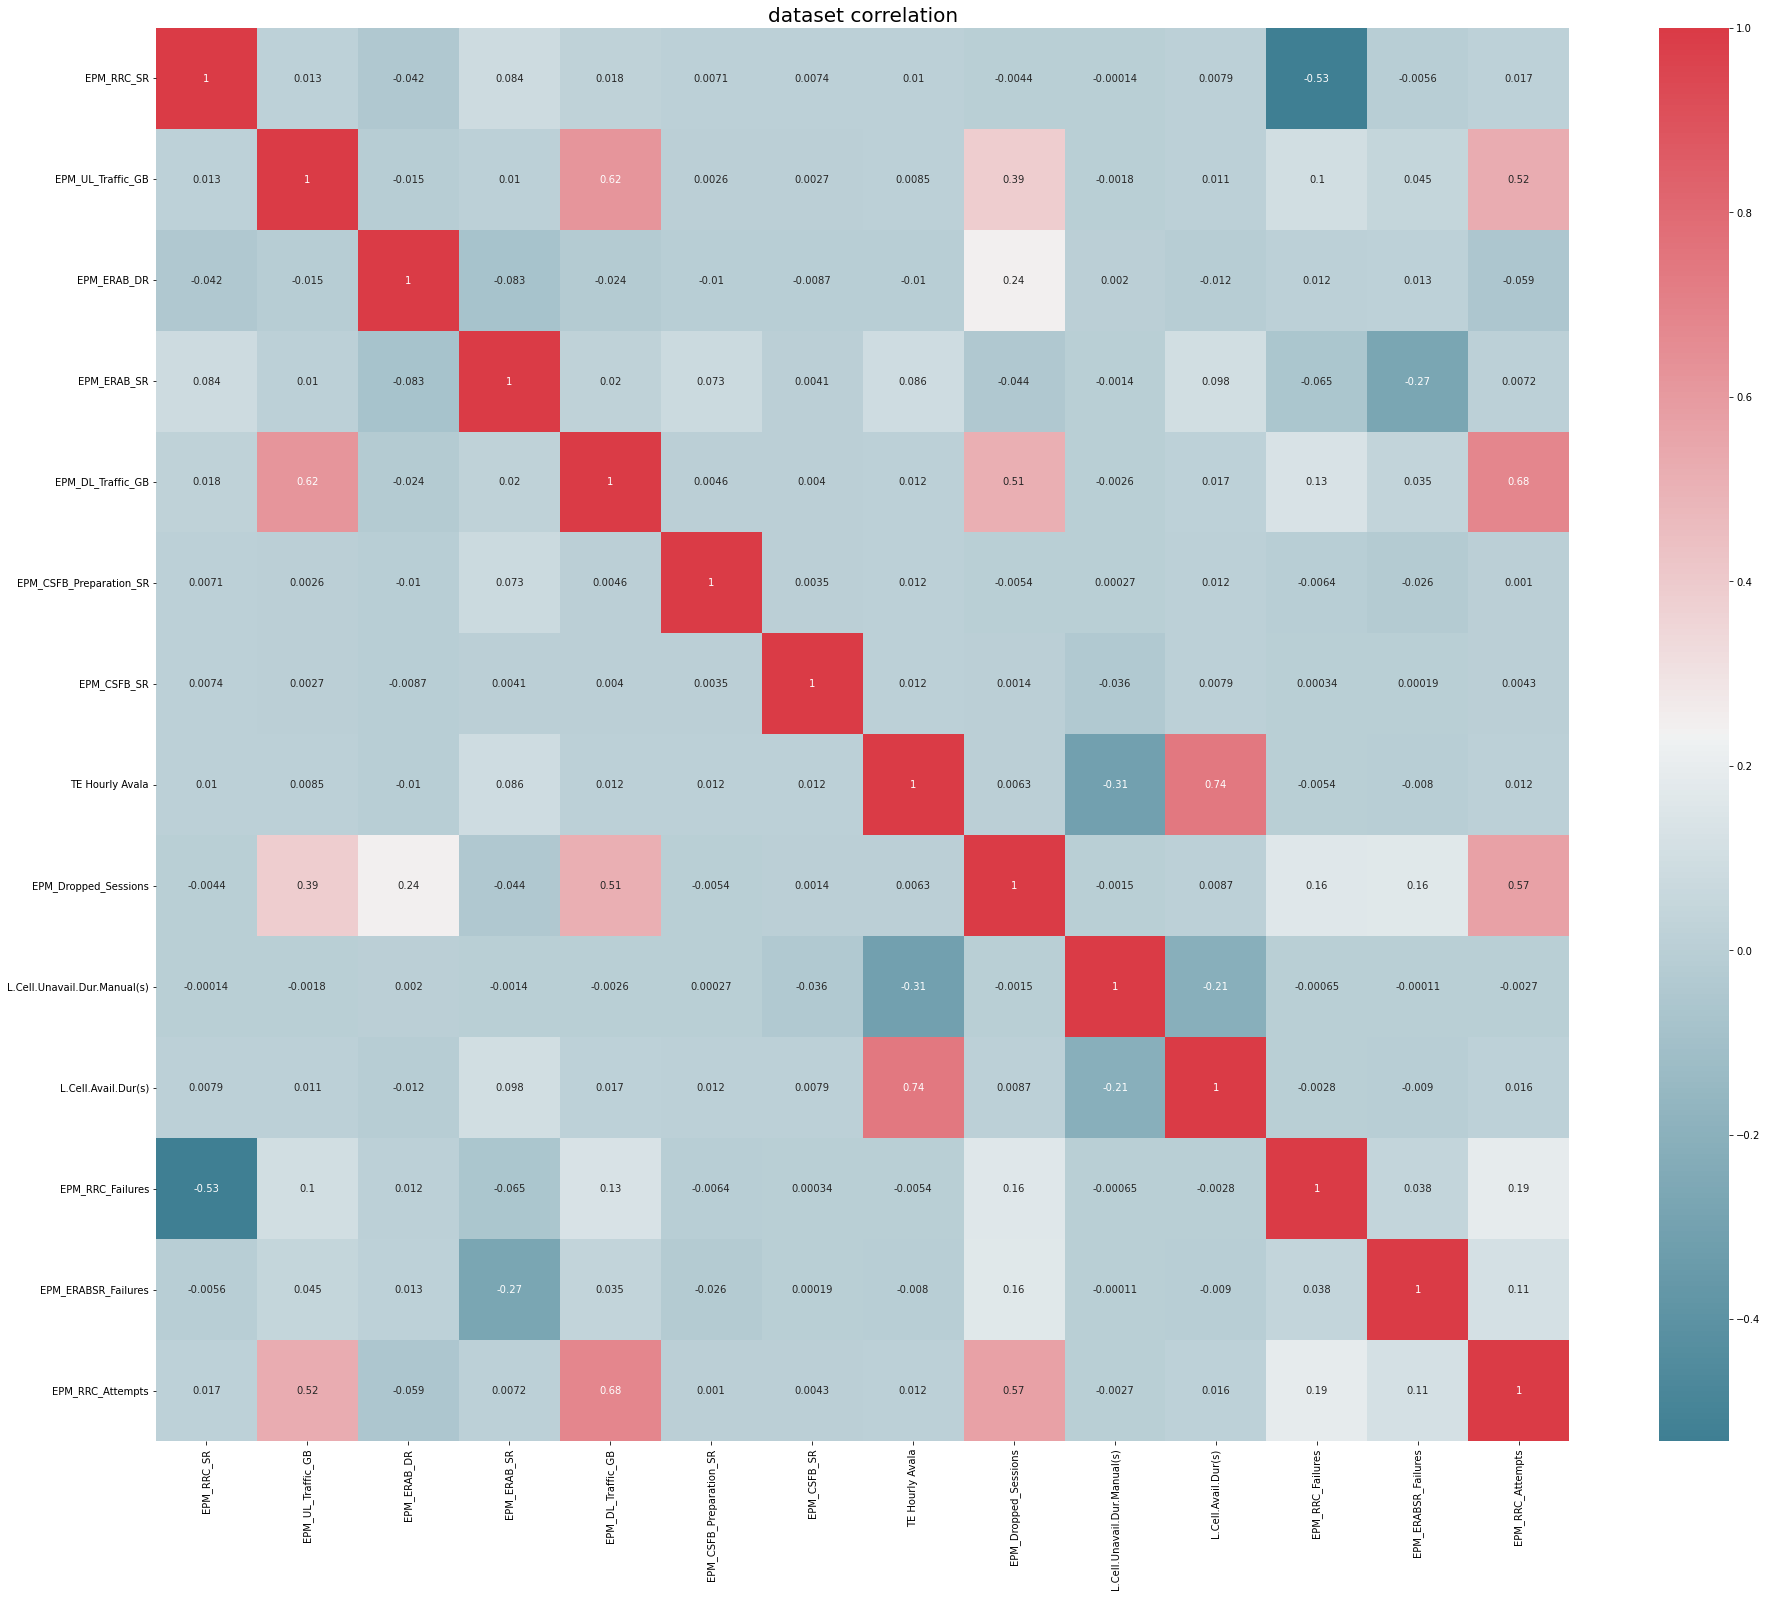

In [56]:
#Heatmap
f, ax = plt.subplots(figsize=(32, 26))
corr = df.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

## Save File to parquet file

In [16]:
df.to_parquet('../data/processed/KPI_processed.parquet')

In [57]:
df.to_parquet('../data/processed/KPI_processed_correlated.parquet')